In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set()

In [2]:
#Set the working Directory
os.chdir("E:/Data Science/Data Science/Edureka/Case Studies/3. Hurricanes and Typhoons")

In [3]:
#Check the working Directory
os.getcwd()

'E:\\Data Science\\Data Science\\Edureka\\Case Studies\\3. Hurricanes and Typhoons'

In [4]:
#Load the Data
Dataset = pd.read_csv("atlantic.csv")

In [5]:
#Load the top 5 head of the Dataset
Dataset.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,AL011851,UNNAMED,18510625,0,,HU,28.0N,94.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,AL011851,UNNAMED,18510625,600,,HU,28.0N,95.4W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,AL011851,UNNAMED,18510625,1200,,HU,28.0N,96.0W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,AL011851,UNNAMED,18510625,1800,,HU,28.1N,96.5W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,AL011851,UNNAMED,18510625,2100,L,HU,28.2N,96.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [6]:
#Convert caegorical into numerical
Dataset.Status = pd.Categorical(Dataset.Status)
Dataset["Status"] = Dataset.Status.cat.codes

In [7]:
Dataset1 = Dataset.copy()
Dataset1.drop(["ID"],axis=1,inplace=True)
Dataset1.drop(["Name"],axis=1,inplace=True)
Dataset1.drop(["Date"],axis=1,inplace=True)
Dataset1.drop(["Time"],axis=1,inplace=True)
Dataset1.drop(["Event"],axis=1,inplace=True)
Dataset1.drop(["Latitude"],axis=1,inplace=True)
Dataset1.drop(["Longitude"],axis=1,inplace=True)
Dataset1.shape

(49105, 15)

In [8]:
#Columns
Dataset1.columns

Index(['Status', 'Maximum Wind', 'Minimum Pressure', 'Low Wind NE',
       'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE',
       'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW',
       'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW'],
      dtype='object')

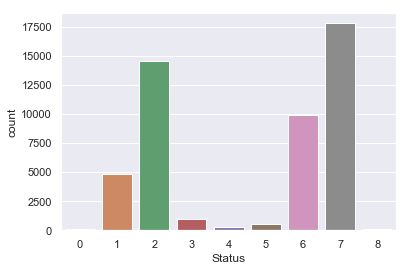

In [9]:
sns.countplot(Dataset['Status'],label="count")

In [10]:
# Split Data into Independent and Dependent
X = Dataset1[['Maximum Wind', 'Minimum Pressure', 'Low Wind NE',
       'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE',
       'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW',
       'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW']]

y=Dataset1["Status"]

In [11]:
#Import the library for train test split and creating train test Data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [12]:
#Specific implementation of Naive byes
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB() # instantiate the Naive byes object
naive_bayes.fit(X_train,y_train)
prediction = naive_bayes.predict(X_test)
prediction 

array([2, 6, 6, ..., 6, 6, 6], dtype=int8)

In [13]:
from sklearn import metrics
metrics.accuracy_score(prediction,y_test)

0.47135487374423024

In [14]:
from sklearn.metrics import confusion_matrix
Confusion_matrix = confusion_matrix(prediction,y_test)
Confusion_matrix

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,  181,    0,    0,    0,    0,    0,    0],
       [   0,  149, 3995,    0,    0,    4,    0,    1,    0],
       [  12,  222,  205,  258,    6,   29,  237,  611,   11],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0],
       [  10, 1122,    0,   37,   91,  125, 2691, 4715,   20],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0]],
      dtype=int64)

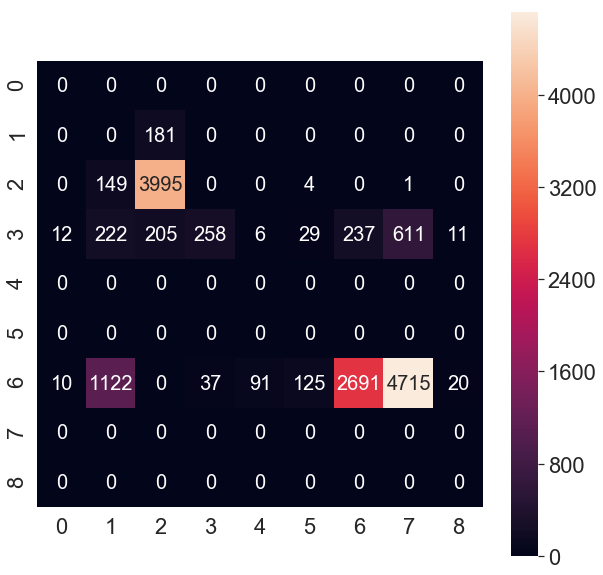

In [15]:
Data_new = pd.DataFrame(Confusion_matrix, range(9),range(9))
plt.figure(figsize = (10,10))
sns.set(font_scale=2) #for label size
sns.heatmap(Confusion_matrix, square=True, annot=True,annot_kws={"size": 20},fmt="d")# font size

In [16]:
print("Number of error are %d out of total observation is %d",(y_test!=prediction).sum(),Dataset1.shape[0])

Number of error are %d out of total observation is %d 7788 49105


In [17]:
accuracy = (49105-7788)/7788
accuracy

5.305213148433487

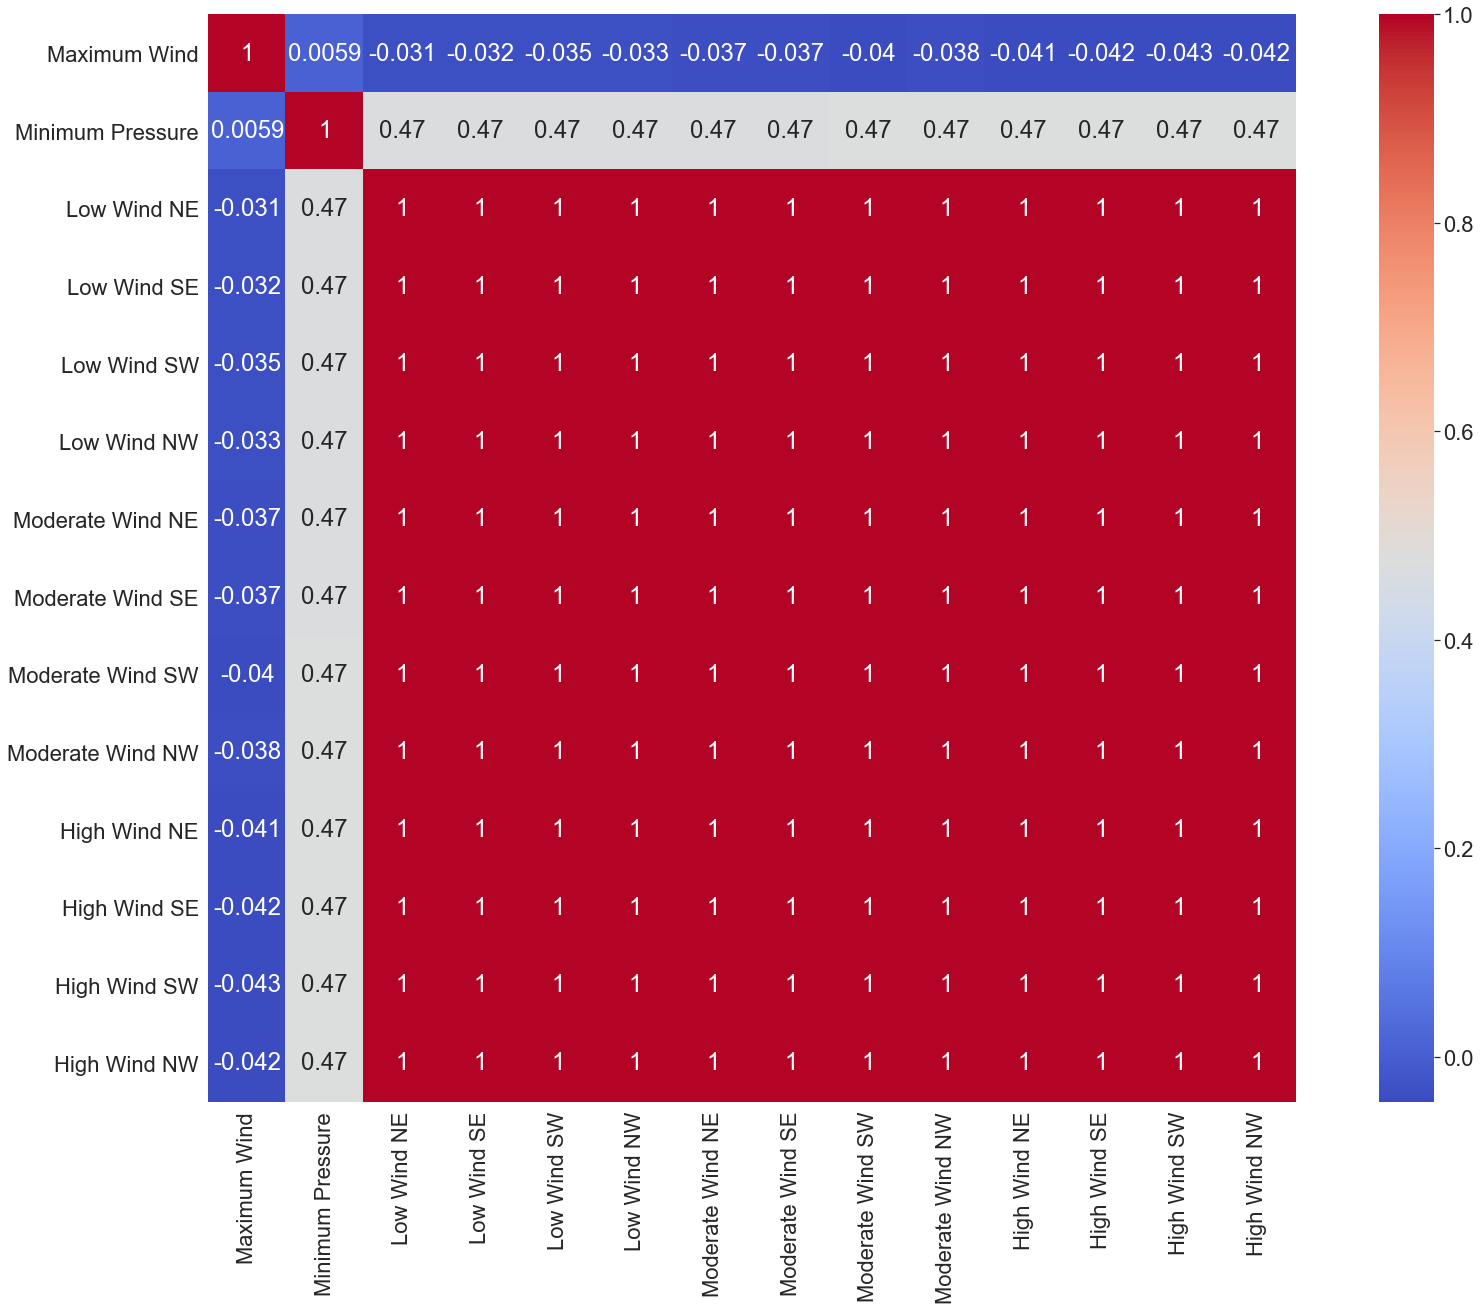

In [18]:
#correlation matrix
corr = X_test.corr()
plt.figure(figsize = (30,20))
sns.heatmap(corr,square=True, annot=True, cmap="coolwarm")